In [16]:
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l

def f(x):
    return 3*x**2-4*x

In [17]:
#用svg格式输出
def use_svg_display(): #@save
    backend_inline.set_matplotlib_formats('svg')


In [18]:
#设置图像大小
def set_figsize(figsize=(3.5,2.5)): #@save
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

In [19]:
#设置轴相关属性 标签、范围、缩放（线性或log）、图例
# @save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):

    """设置matplotlib的轴"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()


In [20]:
#定义一个plot 函数来简介的绘制曲线
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    if legend is None:
        legend = []
    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()
    def has_one_axis(X):  #X是否是一维
        return (hasattr(X,"ndim") and X.ndim == 1 or isinstance(X, list) 
                and not hasattr(X[0],"__len__"))   
        #有维度且维度为1或者是列表类型且列表的元素不可迭代（即是一维的）
    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X  #y为空则用纵轴来表示x的值，横轴为空
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)   #若显示多条曲线，则x需要进行对应复制
    #清屏操作
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)


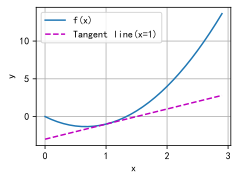

In [28]:
x = np.arange(0,3,0.1)
plot(x,[f(x), 2 * x -3],'x','y',legend=['f(x)','Tangent line(x=1)'])


[<AxesSubplot:title={'center':'Plot 1'}, xlabel='x', ylabel='y'>
 <AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
 <AxesSubplot:>]
Figure(1500x600)


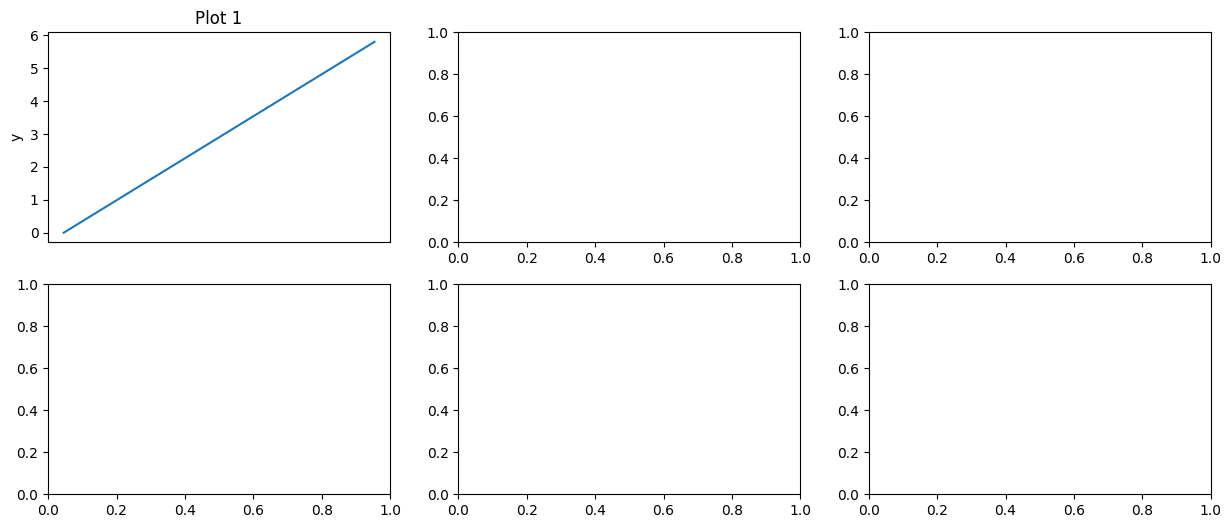

In [10]:
from d2l import torch as d2l
import numpy as np

# 创建一个图表，包含2行3列的子图
# figsize参数控制图表的大小
fig, axes = d2l.plt.subplots(2, 3, figsize=(15, 6))
x1 = np.arange(0,3,0.1)
y1 = 2 * x1

# axes是一个二维数组，可以通过行列索引访问每个子图的轴对象
axes[0, 0].plot(x1, y1)  # 示例：在第一个子图中绘制曲线
axes[0, 0].set_xlabel('x')
axes[0, 0].set_ylabel('y')
axes[0, 0].set_title('Plot 1')
axes[0, 0].get_xaxis().set_visible(False)
axes = axes.flatten()
print(axes)
print(fig)

# 可以对每个子图进行进一步的设置和绘制
# ...

# 显示图表
d2l.plt.show()


In [3]:
import torch

# 创建一个需要梯度的张量
x = torch.tensor(2.0, requires_grad=True)

# 定义一个计算
y = x * x + 2 * x + 1

# 对计算结果y进行反向传播
y.backward()

# 输出x的梯度
print("Gradient of x:", x.grad.item())


Gradient of x: 6.0
